# T-Tests

<img src="../img/t_test.png" width="80%">

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# One-sample t-test

Test if the average temperature in Beutenberg for January is significantly higher than 0°C.

In [3]:
# Load the dataset
weather_data = pd.read_csv('../data/weather_data.csv')

# Convert 'Date Time' to datetime format
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

# Filter for location "Beutenberg"
beutenberg_data = weather_data[weather_data['location'] == 'Beutenberg']

# Further filter data for January
january_data = beutenberg_data[beutenberg_data['date_time'].dt.month == 1]

In [4]:
january_data['temperature_celsius'].mean()

2.868807123655914

In [ ]:
# calculates the t-test
# popmean = hypothesized population mean
# in this case it's 0 because we're testing if the average temperature is significant higher than 0
january_data_ttest = stats.ttest_1samp(january_data['temperature_celsius'], popmean=0)
january_data_ttest

Ttest_1sampResult(statistic=38.6801972422407, pvalue=1.6395840979748228e-265)

In [ ]:
p_value = january_data_ttest[1] # we reject the null hypothesis if the value of the test is lower than the alpha
alpha = 0.05

if p_value < alpha:
    print(f"The null hypothesis is rejected with the confidence of {(1-alpha)*100}%.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

The null hypothesis is rejected with the confidence of 95.0%.


# Two-sample t-test

Compare the average temperatures of January for 2023 vs January 2022 to see if there's a significant difference.

In [5]:
january_2023 = january_data[january_data['date_time'].dt.year == 2023]
january_2022 = january_data[january_data['date_time'].dt.year == 2022]

In [6]:
january_2022.sample(10)

,date_time,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,location,season
18264,2022-01-31 02:00:00,990.39,2.57,-2.30,70.13,5.15,3.24,1248.87,2.51,202.1,0.0,Beutenberg,winter
17735,2022-01-09 01:00:00,971.28,0.18,-1.78,86.60,5.36,3.44,1235.33,4.59,189.7,0.0,Beutenberg,winter
17754,2022-01-09 20:00:00,978.72,2.58,1.45,92.20,6.78,4.32,1233.29,0.65,271.4,0.0,Beutenberg,winter
18024,2022-01-21 02:00:00,1000.04,-2.07,-6.30,72.60,3.81,2.37,1283.29,1.71,260.5,0.0,Beutenberg,winter
17775,2022-01-10 17:00:00,997.99,4.21,2.80,90.50,7.47,4.67,1249.91,0.72,226.4,0.0,Beutenberg,winter
17976,2022-01-19 02:00:00,1006.59,3.03,3.03,100.00,7.59,4.71,1266.06,0.77,219.3,0.0,Beutenberg,winter
17613,2022-01-03 23:00:00,980.00,6.40,6.40,100.00,9.62,6.13,1216.71,1.97,196.9,0.0,Beutenberg,winter
18130,2022-01-25 12:00:00,1006.12,1.99,1.29,95.10,6.71,4.16,1270.65,1.45,242.4,0.0,Beutenberg,winter
17595,2022-01-03 05:00:00,984.56,8.14,6.03,86.50,9.38,5.95,1214.93,1.68,246.5,0.0,Beutenberg,winter
18050,2022-01-22 04:00:00,998.09,3.79,3.65,99.00,7.94,4.96,1251.70,3.71,263.2,0.0,Beutenberg,winter


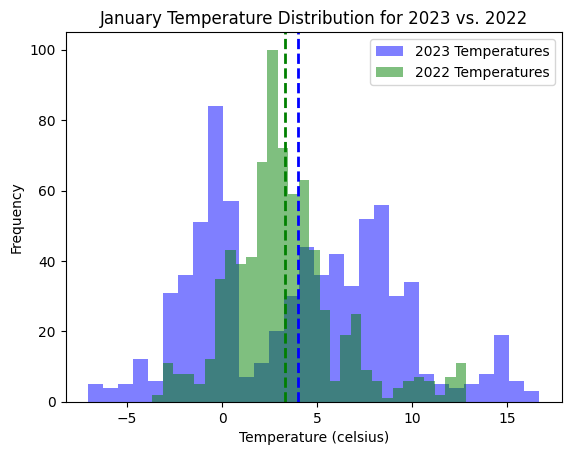

In [7]:
# Ensure your data is suitable for plotting
january_2023_temps = pd.to_numeric(january_2023['temperature_celsius'], errors='coerce').dropna()
january_2022_temps = pd.to_numeric(january_2022['temperature_celsius'], errors='coerce').dropna()

# Plot histograms
plt.hist(january_2023_temps, bins=30, alpha=0.5, label='2023 Temperatures', color='blue')
plt.hist(january_2022_temps, bins=30, alpha=0.5, label='2022 Temperatures', color='green')

# Plot mean temperatures
plt.axvline(january_2023_temps.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(january_2022_temps.mean(), color='green', linestyle='dashed', linewidth=2)

plt.legend()
plt.title('January Temperature Distribution for 2023 vs. 2022')
plt.xlabel('Temperature (celsius)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# now we will run a two-tailed t-test to check if the difference is significant different
year_on_year_ttest = stats.ttest_ind(january_2023['temperature_celsius'], january_2022['temperature_celsius'])

# in this set you don't see a value for alpha here, because you're comparing the mean of two populations
# 
year_on_year_ttest

TtestResult(statistic=3.2041755185968026, pvalue=0.001383248057584368, df=1486.0)

In [ ]:
p_value = year_on_year_ttest[1]
alpha = 0.05

if p_value < alpha:
    print(f"The null hypothesis is rejected with the confidence of {(1-alpha)*100}%.")
    # with other words, there is a significant difference between the values
else:
    print("There is not enough evidence to reject the null hypothesis.")

The null hypothesis is rejected with the confidence of 95.0%.
